In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.utils import normalize,to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
import emnist

In [4]:
tf.__version__

'2.0.0-alpha0'

In [5]:
emnist.list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [6]:
x,y=emnist.extract_training_samples('byclass')

In [7]:
x_test,y_test=emnist.extract_test_samples('byclass')

In [6]:
x.shape

(697932, 28, 28)

In [7]:
y.shape

(697932,)

In [8]:
pd.unique(y)

array([35, 36,  6,  3, 22, 38,  5,  9, 47,  4,  7, 56, 29, 40, 55, 57, 43,
       32, 15, 26,  2, 28,  8, 49, 12,  1, 59, 18, 41,  0, 46, 23, 51, 24,
       31, 45, 39, 11, 54, 19, 20, 61, 25, 37, 52, 58, 14, 34, 30, 27, 16,
       33, 21, 60, 48, 53, 13, 10, 50, 17, 42, 44], dtype=uint64)

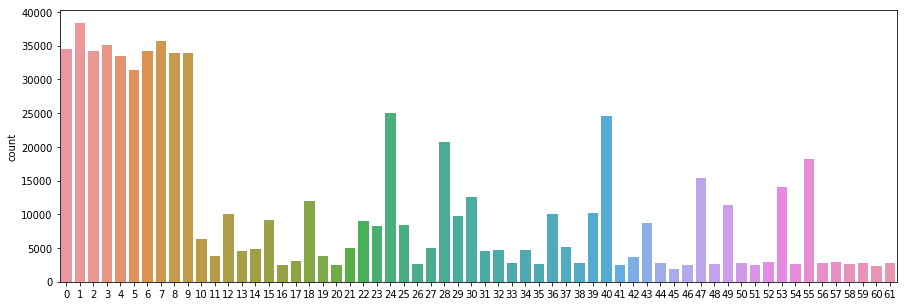

In [9]:
plt.figure(figsize=(15,5))
sns.countplot(y)

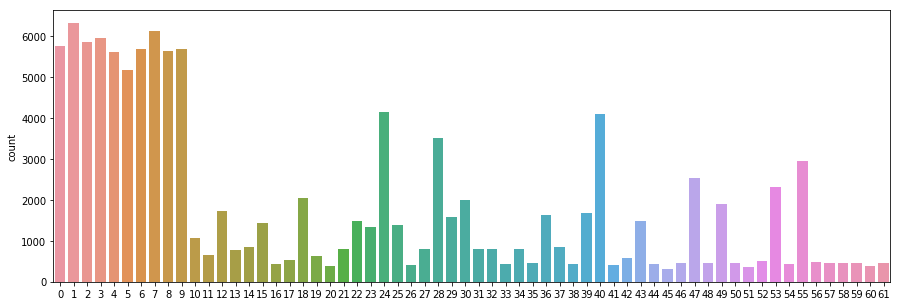

In [10]:
plt.figure(figsize=(15,5))
sns.countplot(y_test)

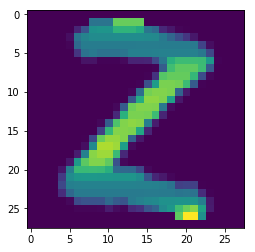

In [11]:
plt.imshow(normalize(x[0]))

In [8]:
x_norm=normalize(x)
y_ohe=to_categorical(y)

x_test_norm=normalize(x_test)
y_test_ohe=to_categorical(y_test)

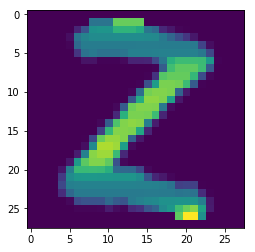

In [13]:
plt.imshow(x_norm[0])

In [9]:
x_norm=x_norm.reshape((697932, 28, 28,1))
x_test_norm=x_test_norm.reshape((116323, 28, 28,1))

In [10]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [11]:
x_train, x_val, y_train, y_val = train_test_split(x_norm, y_ohe, test_size=0.3, random_state=143)

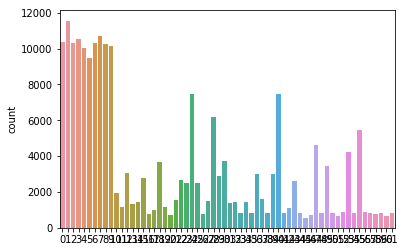

In [26]:
sns.countplot(list(map(np.argmax,y_val)))

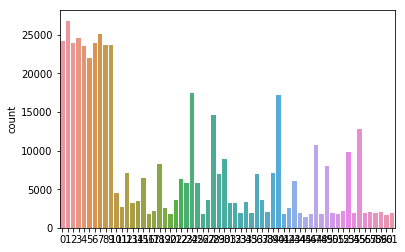

In [27]:
sns.countplot(list(map(np.argmax,y_train)))

In [46]:
y_val.shape

(209380, 62)

In [12]:
x_train=x_train.reshape((len(x_train),28,28,1))
x_val=x_val.reshape((len(x_val),28,28,1))
x_test=x_test_norm.reshape((len(x_test),28,28,1))
train_gen=ImageDataGenerator(rotation_range=30,width_shift_range=0.2,height_shift_range=0.1,\
                   shear_range=10,zoom_range=0.2,fill_mode='nearest').flow(x_train,y_train,batch_size=128)

val_gen=ImageDataGenerator().flow(x_val,y_val,batch_size=128)


In [23]:
model2=models.Sequential()

model2.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Conv2D(64,(3,3),activation='relu'))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Conv2D(128,(3,3),activation='relu'))
model2.add(layers.Flatten())
model2.add(layers.Dense(128,activation='relu'))
model2.add(layers.Dense(62,activation='softmax'))

model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [14]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [ ]:
hist=model2.fit_generator(train_gen,steps_per_epoch=10000,epochs=10,verbose=2,validation_data=val_gen,validation_steps=2000)

Epoch 1/10
